# Introduction aux modèles discriminants avec PyTorch

In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import optim
import numpy as np 

## 1 Exercice 1 (1 point)

In [2]:
def softmax(x):
    soft_max = torch.exp(x - torch.max(x)) / torch.sum(torch.exp(x - torch.max(x)))
    return soft_max

In [3]:
x = torch.tensor([5., 1., 2., -1.])
softmax(x)

tensor([0.9341, 0.0171, 0.0465, 0.0023])

## Préambule: comment utiliser une fonction d’optimisation de gradient avec PyTorch ?

0
Loss: tensor(0.0100)
theta tensor([5.1999], requires_grad=True) tensor([-2.3000], requires_grad=True) 

50
Loss: tensor(0.0098)
theta tensor([5.1975], requires_grad=True) tensor([-2.2971], requires_grad=True) 

100
Loss: tensor(0.0095)
theta tensor([5.1950], requires_grad=True) tensor([-2.2937], requires_grad=True) 

150
Loss: tensor(0.0093)
theta tensor([5.1926], requires_grad=True) tensor([-2.2904], requires_grad=True) 

200
Loss: tensor(0.0090)
theta tensor([5.1902], requires_grad=True) tensor([-2.2870], requires_grad=True) 

250
Loss: tensor(0.0088)
theta tensor([5.1878], requires_grad=True) tensor([-2.2836], requires_grad=True) 

300
Loss: tensor(0.0086)
theta tensor([5.1854], requires_grad=True) tensor([-2.2802], requires_grad=True) 

350
Loss: tensor(0.0084)
theta tensor([5.1830], requires_grad=True) tensor([-2.2768], requires_grad=True) 

400
Loss: tensor(0.0082)
theta tensor([5.1807], requires_grad=True) tensor([-2.2735], requires_grad=True) 

450
Loss: tensor(0.0080)
theta 

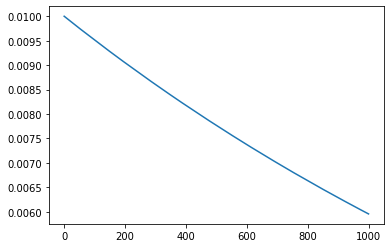

In [4]:
def g(x, a, b):
    return a*x + b


train_set = torch.tensor([(1, 3), (2, 8)])

def L(g, train_set, a, b):
    mse = 0
    for line in train_set:
        x = line[0]
        y = line[1]
        mse += (y - g(x, a, b))**2

    mse /= train_set.shape[0]
    return mse

ak = torch.tensor([5.2], requires_grad = True) # on declare un parametre avec requires_grad = True
bk = torch.tensor([-2.3], requires_grad = True)

alpha = 5*10**(-5)

K = 1000
list_L = torch.zeros(K)
optimizer = optim.Adam([ak, bk], lr = alpha) # on definit un optimizer, avec en argumentles parametres lies, et lr son learning rate

for k in range(K):
    optimizer.zero_grad() # on met les gradients a 0
    loss = L(g, train_set, ak, bk)
    loss.backward() # appel de la fonction backward
    optimizer.step() # cette fonction applique l’optimizer

    list_L[k] = loss.item()

    if k % 50 == 0:
        print(k)
        print("Loss:", list_L[k])
        print("theta", ak, bk, "\n")


plt.plot(list_L)
plt.show()

## 3 Exercice 2 (5 points) Classification de chiffre avec la régression logistique

### 3.1 Prise en main du dataset

In [5]:
dataset = torchvision.datasets.MNIST("./", download = True)
train_set_y, train_set_x = dataset.data[:50000], dataset.targets[:50000]
test_set_y, test_set_x = dataset.data[50000:], dataset.targets[50000:]

train_set_y = (train_set_y.view(50000, -1) + 0.0)
mean_train, std_train = torch.mean(train_set_y), torch.std(train_set_y)
train_set_y = (train_set_y - mean_train)/std_train

train_set = []
for i in range(50000):
    train_set.append([train_set_x[i], train_set_y[i]])

test_set_y = (test_set_y.view(10000, -1) + 0.0)
mean_test, std_test = torch.mean(test_set_y), torch.std(test_set_y)
test_set_y = (test_set_y - mean_test)/std_test

test_set = []
for i in range(10000):
    test_set.append([test_set_x[i], test_set_y[i]])

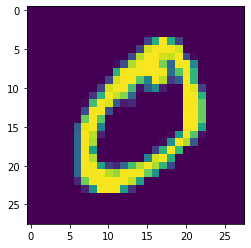

tensor(0)


In [6]:
exemple = 1
plt.imshow(train_set[exemple][1].view(28, 28))
plt.show()
print(train_set[exemple][0])

### 3.2 Votre objectif !

In [7]:
def regression_logistique(data):

    def softmax(x, W, b):
        y = W @ x + b
        soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
        return soft_max

    def cross_entropy(softmax, batch_train_set, a, b):
        Lce = 0
        for line in batch_train_set:
            x = line[0]
            y = line[1]
            Lce -= torch.log(softmax(y, a, b)[x])
        Lce /= len(batch_train_set)
        return Lce
    
    def accuracy(W_lr, b_lr, test_set):
        accuracy = 0
        for line in test_set:
            predict = torch.argmax(softmax(line[1], W_lr, b_lr))
            if predict == line[0]:
                accuracy += 1
        accuracy /= len(test_set)
        return accuracy
    
    train_set = data

    W_lr = torch.load("TP4_functions/W_lr.pt").requires_grad_(True)
    b_lr = torch.load("TP4_functions/b_lr.pt").requires_grad_(True)

    alpha = 5*10**(-5)

    K = 1000
    list_L = torch.zeros(K)
    optimizer = optim.Adam([W_lr, b_lr], lr = alpha) 

    for k in range(K):
        optimizer.zero_grad()
        random_index = np.random.randint(0, len(train_set),size = 256)
        batch_train_set = []
        for i in random_index:
            batch_train_set.append(train_set[i])
        loss = cross_entropy(softmax, batch_train_set, W_lr, b_lr)
        loss.backward()
        optimizer.step()

        list_L[k] = loss.item()

        if k % 50 == 0:
            print(k)
            print("Loss:", list_L[k])
            print("Accuracy:", accuracy(W_lr, b_lr, test_set))

    print("Accuracy final :", accuracy(W_lr, b_lr, test_set))
    plt.plot(list_L)
    plt.show()
    return 

0
Loss: tensor(2.4744)
Accuracy: 0.0753
50
Loss: tensor(2.1366)
Accuracy: 0.2745
100
Loss: tensor(1.8314)
Accuracy: 0.4698
150
Loss: tensor(1.5907)
Accuracy: 0.6028
200
Loss: tensor(1.4039)
Accuracy: 0.681
250
Loss: tensor(1.2701)
Accuracy: 0.731
300
Loss: tensor(1.2013)
Accuracy: 0.7665
350
Loss: tensor(1.0321)
Accuracy: 0.792
400
Loss: tensor(0.8983)
Accuracy: 0.8118
450
Loss: tensor(0.9717)
Accuracy: 0.8235
500
Loss: tensor(0.8883)
Accuracy: 0.8346
550
Loss: tensor(0.7274)
Accuracy: 0.8413
600
Loss: tensor(0.7488)
Accuracy: 0.8477
650
Loss: tensor(0.7207)
Accuracy: 0.8544
700
Loss: tensor(0.6786)
Accuracy: 0.8606
750
Loss: tensor(0.7100)
Accuracy: 0.8643
800
Loss: tensor(0.6504)
Accuracy: 0.8679
850
Loss: tensor(0.6314)
Accuracy: 0.8711
900
Loss: tensor(0.5822)
Accuracy: 0.8746
950
Loss: tensor(0.5684)
Accuracy: 0.8753
Accuracy final : 0.8782


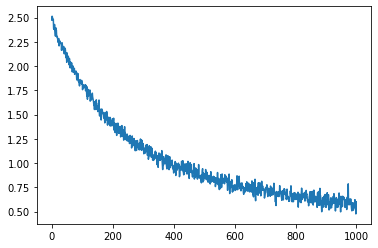

In [8]:
regression_logistique(train_set)

### Verification avec les données de l'énoncé :

In [9]:
def regression_logistique_verif(data):

    def softmax(x, W, b):
        y = W @ x + b
        soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
        return soft_max

    def cross_entropy(softmax, batch_train_set, a, b):
        Lce = 0
        for line in batch_train_set:
            x = line[0]
            y = line[1]
            Lce -= torch.log(softmax(y, a, b)[x])
        Lce /= len(batch_train_set)
        return Lce
    
    def accuracy(W_lr, b_lr, test_set):
        accuracy = 0
        for line in test_set:
            predict = torch.argmax(softmax(line[1], W_lr, b_lr))
            if predict == line[0]:
                accuracy += 1
        accuracy /= len(test_set)
        return accuracy
    
    train_set = data

    W_lr = torch.load("TP4_functions/W_lr.pt").requires_grad_(True)
    b_lr = torch.load("TP4_functions/b_lr.pt").requires_grad_(True)

    alpha = 5*10**(-5)

    K = 1000
    list_L = torch.zeros(K)
    optimizer = optim.Adam([W_lr, b_lr], lr = alpha) 

    for k in range(K):
        optimizer.zero_grad()
        loss = cross_entropy(softmax, train_set, W_lr, b_lr)
        loss.backward()
        optimizer.step()

        list_L[k] = loss.item()
        
        if k % 50 == 0:
            print(k)
            print("Loss:", list_L[k])
            break
            print("Accuracy:", accuracy(W_lr, b_lr, test_set))


    #plt.plot(list_L)
    #plt.show()
    return 

In [10]:
regression_logistique_verif(train_set[:100])

0
Loss: tensor(2.4652)


## 4 Exercice 3 (8 points) Réseaux de neurones pour la classification d’images

## Reseau de neurones avec softmax :

In [11]:
def classification_image_softmax(data):

    def softmax(x, W, b):
        y = W @ x + b
        soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
        return soft_max

    def cross_entropy(softmax, batch_train_set, W1, b1, W2, b2):
        Lce = 0
        for line in batch_train_set:
            x = line[0]
            y = line[1]
            h1 = softmax(y, W1, b1)
            h2 = softmax(h1, W2, b2)
            Lce -= torch.log(h2[x])
        Lce /= len(batch_train_set)
        return Lce
    
    def accuracy(W1, b1, W2, b2, test_set):
        accuracy = 0
        for line in test_set:
            x = line[0]
            y = line[1]
            h1 = softmax(y, W1, b1)
            predict = torch.argmax(softmax(h1, W2, b2))
            if predict == line[0]:
                accuracy += 1
        accuracy /= len(test_set)
        return accuracy
    
    train_set = data

    W1 = torch.load("TP4_functions/W1_nn1.pt").requires_grad_(True)
    b1 = torch.load("TP4_functions/b1_nn1.pt").requires_grad_(True)
    W2 = torch.load("TP4_functions/W2_nn1.pt").requires_grad_(True)
    b2 = torch.load("TP4_functions/b2_nn1.pt").requires_grad_(True)

    alpha = 5*10**(-5)

    K = 1000
    list_L = torch.zeros(K)
    optimizer = optim.Adam([W1, b1, W2, b2], lr = alpha) 
    
    for k in range(K):
        optimizer.zero_grad()
        
        random_index = np.random.randint(0, len(train_set),size = 256)
        batch_train_set = []
        for i in random_index:
            batch_train_set.append(train_set[i])
            
        loss = cross_entropy(softmax, batch_train_set, W1, b1, W2, b2)
        loss.backward()
        optimizer.step()

        list_L[k] = loss.item()

        if k % 50 == 0:
            print(k)
            print("Loss:", list_L[k])
            print("Accuracy:", accuracy(W1, b1, W2, b2, test_set))

    print("Accuracy final:", accuracy(W1, b1, W2, b2, test_set))
    plt.plot(list_L)
    plt.show()
    return 

0
Loss: tensor(2.3054)
Accuracy: 0.103
50
Loss: tensor(2.2987)
Accuracy: 0.1135
100
Loss: tensor(2.2870)
Accuracy: 0.1921
150
Loss: tensor(2.2740)
Accuracy: 0.1964
200
Loss: tensor(2.2591)
Accuracy: 0.2375
250
Loss: tensor(2.2467)
Accuracy: 0.3389
300
Loss: tensor(2.2344)
Accuracy: 0.3924
350
Loss: tensor(2.2271)
Accuracy: 0.4271
400
Loss: tensor(2.2142)
Accuracy: 0.4491
450
Loss: tensor(2.2121)
Accuracy: 0.5194
500
Loss: tensor(2.2018)
Accuracy: 0.5463
550
Loss: tensor(2.1973)
Accuracy: 0.5577
600
Loss: tensor(2.1897)
Accuracy: 0.5683
650
Loss: tensor(2.1807)
Accuracy: 0.5738
700
Loss: tensor(2.1764)
Accuracy: 0.58
750
Loss: tensor(2.1683)
Accuracy: 0.5851
800
Loss: tensor(2.1660)
Accuracy: 0.5888
850
Loss: tensor(2.1687)
Accuracy: 0.5936
900
Loss: tensor(2.1583)
Accuracy: 0.5988
950
Loss: tensor(2.1574)
Accuracy: 0.5998
Accuracy final: 0.6052


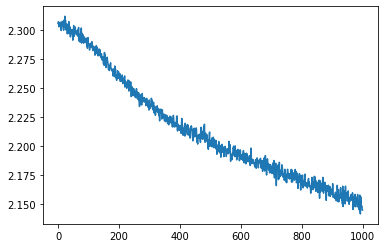

In [12]:
classification_image_softmax(train_set)

### Verification avec les données de l'énoncé :

In [13]:
def classification_image_softmax_verif(data):

    def softmax(x, W, b):
        y = W @ x + b
        soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
        return soft_max

    def cross_entropy(softmax, batch_train_set, W1, b1, W2, b2):
        Lce = 0

        x = batch_train_set[0]
        y = batch_train_set[1]
        h1 = softmax(y, W1, b1)
        h2 = softmax(h1, W2, b2)
        print(h2)
        Lce -= torch.log(h2[x])
        Lce /= len(batch_train_set)
        return Lce
    
    def accuracy(W1, b1, W2, b2, test_set):
        accuracy = 0
        for line in test_set:
            x = line[0]
            y = line[1]
            h1 = softmax(y, W1, b1)
            predict = torch.argmax(softmax(h1, W2, b2))
            if predict == line[0]:
                accuracy += 1
        accuracy /= len(test_set)
        return accuracy
    
    train_set = data

    W1 = torch.load("TP4_functions/W1_nn1.pt").requires_grad_(True)
    b1 = torch.load("TP4_functions/b1_nn1.pt").requires_grad_(True)
    W2 = torch.load("TP4_functions/W2_nn1.pt").requires_grad_(True)
    b2 = torch.load("TP4_functions/b2_nn1.pt").requires_grad_(True)

    alpha = 5*10**(-5)

    K = 1000
    list_L = torch.zeros(K)
    optimizer = optim.Adam([W1, b1, W2, b2], lr = alpha) 
    
    for k in range(K):
        optimizer.zero_grad()            
        loss = cross_entropy(softmax, train_set, W1, b1, W2, b2)
        loss.backward()
        optimizer.step()

        list_L[k] = loss.item()
        break
        if k % 50 == 0:
            print(k)
            print("Loss:", list_L[k])
            print("Accuracy:", accuracy(W1, b1, W2, b2, test_set))


    #plt.plot(list_L)
    #plt.show()
    return 

In [14]:
classification_image_softmax_verif(train_set[0])

tensor([0.1004, 0.0970, 0.0918, 0.1087, 0.1064, 0.1022, 0.0981, 0.0932, 0.1025,
        0.0996], grad_fn=<DivBackward0>)


## Reseau de neurone avec tanh

In [15]:
def classification_image_tanh(data):

    def softmax(x, W, b):
        y = W @ x + b
        soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
        return soft_max

    def cross_entropy(softmax, batch_train_set, W1, b1, W2, b2):
        Lce = 0
        for line in batch_train_set:
            x = line[0]
            y = line[1]
            h1 = torch.tanh(W1 @ y + b1)
            h2 = softmax(h1, W2, b2)
            Lce -= torch.log(h2[x])
        Lce /= len(batch_train_set)
        return Lce
    
    def accuracy(W1, b1, W2, b2, test_set):
        accuracy = 0
        for line in test_set:
            x = line[0]
            y = line[1]
            h1 = torch.tanh(W1 @ y + b1)
            predict = torch.argmax(softmax(h1, W2, b2))
            if predict == line[0]:
                accuracy += 1
        accuracy /= len(test_set)
        return accuracy
    
    train_set = data

    W1 = torch.load("TP4_functions/W1_nn2.pt").requires_grad_(True)
    b1 = torch.load("TP4_functions/b1_nn2.pt").requires_grad_(True)
    W2 = torch.load("TP4_functions/W2_nn2.pt").requires_grad_(True)
    b2 = torch.load("TP4_functions/b2_nn2.pt").requires_grad_(True)


    alpha = 5*10**(-5)

    K = 1000
    list_L = torch.zeros(K)
    optimizer = optim.Adam([W1, b1, W2, b2], lr = alpha) 
    
    for k in range(K):
        optimizer.zero_grad()
        
        random_index = np.random.randint(0, len(train_set),size = 256)
        batch_train_set = []
        for i in random_index:
            batch_train_set.append(train_set[i])
            
        loss = cross_entropy(softmax, batch_train_set, W1, b1, W2, b2)
        loss.backward()
        optimizer.step()
        list_L[k] = loss.item()

        if k % 50 == 0:
            print(k)
            print("Loss:", list_L[k])
            print("Accuracy:", accuracy(W1, b1, W2, b2, test_set))

    print("Accuracy final:", accuracy(W1, b1, W2, b2, test_set))
    plt.plot(list_L)
    plt.show()
    return 

0
Loss: tensor(2.2371)
Accuracy: 0.1461
50
Loss: tensor(1.6537)
Accuracy: 0.6862
100
Loss: tensor(1.3012)
Accuracy: 0.7811
150
Loss: tensor(1.1338)
Accuracy: 0.8273
200
Loss: tensor(1.0163)
Accuracy: 0.8496
250
Loss: tensor(0.8908)
Accuracy: 0.8652
300
Loss: tensor(0.7026)
Accuracy: 0.8729
350
Loss: tensor(0.6692)
Accuracy: 0.8824
400
Loss: tensor(0.6336)
Accuracy: 0.8846
450
Loss: tensor(0.6339)
Accuracy: 0.8908
500
Loss: tensor(0.5736)
Accuracy: 0.8936
550
Loss: tensor(0.4963)
Accuracy: 0.8963
600
Loss: tensor(0.5316)
Accuracy: 0.8995
650
Loss: tensor(0.4243)
Accuracy: 0.9014
700
Loss: tensor(0.4595)
Accuracy: 0.9008
750
Loss: tensor(0.4443)
Accuracy: 0.9041
800
Loss: tensor(0.4126)
Accuracy: 0.9065
850
Loss: tensor(0.3742)
Accuracy: 0.9068
900
Loss: tensor(0.4175)
Accuracy: 0.9085
950
Loss: tensor(0.3984)
Accuracy: 0.9097
Accuracy final: 0.9118


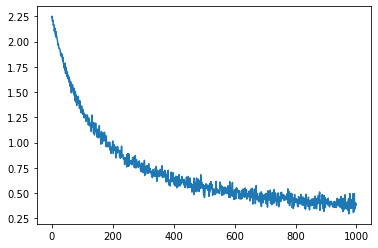

In [16]:
classification_image_tanh(train_set)

### Verification avec les données de l'énoncé :

In [17]:
def classification_image_tanh_verif(data):

    def softmax(x, W, b):
        y = W @ x + b
        soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
        return soft_max

    def cross_entropy(softmax, batch_train_set, W1, b1, W2, b2):
        Lce = 0
        x = batch_train_set[0]
        y = batch_train_set[1]
        h1 = torch.tanh(W1 @ y + b1)
        h2 = softmax(h1, W2, b2)
        print(h2)
        Lce -= torch.log(h2[x])
        Lce /= len(batch_train_set)
        return Lce
    
    def accuracy(W1, b1, W2, b2, test_set):
        accuracy = 0
        for line in test_set:
            x = line[0]
            y = line[1]
            h1 = torch.tanh(W1 @ y + b1)
            predict = torch.argmax(softmax(h1, W2, b2))
            if predict == line[0]:
                accuracy += 1
        accuracy /= len(test_set)
        return accuracy
    
    train_set = data

    W1 = torch.load("TP4_functions/W1_nn2.pt").requires_grad_(True)
    b1 = torch.load("TP4_functions/b1_nn2.pt").requires_grad_(True)
    W2 = torch.load("TP4_functions/W2_nn2.pt").requires_grad_(True)
    b2 = torch.load("TP4_functions/b2_nn2.pt").requires_grad_(True)


    alpha = 5*10**(-5)

    K = 1000
    list_L = torch.zeros(K)
    optimizer = optim.Adam([W1, b1, W2, b2], lr = alpha) 
    
    for k in range(K):
        optimizer.zero_grad()
            
        loss = cross_entropy(softmax, train_set, W1, b1, W2, b2)
        loss.backward()
        optimizer.step()
        list_L[k] = loss.item()
        break
        if k % 50 == 0:
            print(k)
            print("Loss:", list_L[k])
            print("Accuracy:", accuracy(W1, b1, W2, b2, test_set))


    #plt.plot(list_L)
    #plt.show()
    return 

In [18]:
classification_image_tanh_verif(train_set[0])

tensor([0.0936, 0.1466, 0.0796, 0.1929, 0.0858, 0.0740, 0.0755, 0.1017, 0.0613,
        0.0890], grad_fn=<DivBackward0>)


Conclusion :

Lorsque l'on met une fonction d'activation tanh dans les couches cachées, la loss décroit beaucoup plus rapidement et l'accuracy est meilleur. Cette fonction semble donc plus adapté pour les couche cachées. Peut-être la fonction tanh souffre moins du vanishing gradient ?

## 5 Exercice 4 (6 points) Maximum Entropy Markov Model pour le POS tagging

### 5.1 Nos données

In [1]:
from TP4_functions.load_conll2000 import load_conll2000_glove

path = "TP4_functions/"
Omega_X, train_set, test_set = load_conll2000_glove(path)

In [2]:
train_set_x_string = []
train_set_y = []
for t in train_set :
    train_set_x_string.append(t[0])
    train_set_y.append(t[1])

test_set_x_string = []
test_set_y = []
for t in test_set :
    test_set_x_string.append(t[0])
    test_set_y.append(t[1])

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Omega_X)

train_set_x = []
for i in train_set_x_string : 
    train_set_x.append(le.transform(i))
    
test_set_x = []
for i in test_set_x_string : 
    test_set_x.append(le.transform(i))

### 5.2 Votre objectif !

0
Loss: tensor(2.8411)
Accuracy: 0.04312219009223885
50
Loss: tensor(2.3730)
Accuracy: 0.2847373197965257
100
Loss: tensor(2.0302)
Accuracy: 0.44040357135318825
150
Loss: tensor(1.8226)
Accuracy: 0.5080524305042531
200
Loss: tensor(1.7000)
Accuracy: 0.5733794879371847
250
Loss: tensor(1.5350)
Accuracy: 0.6014732887265973
300
Loss: tensor(1.4376)
Accuracy: 0.6450176245857695
350
Loss: tensor(1.3333)
Accuracy: 0.6619667771281423
400
Loss: tensor(1.2551)
Accuracy: 0.675517656246702
450
Loss: tensor(1.2567)
Accuracy: 0.699601072250248
500
Loss: tensor(1.0957)
Accuracy: 0.711294509994301
550
Loss: tensor(1.1025)
Accuracy: 0.7216792958608608
600
Loss: tensor(1.0451)
Accuracy: 0.7264495430272073
650
Loss: tensor(1.0406)
Accuracy: 0.7392616670536336
700
Loss: tensor(1.0261)
Accuracy: 0.7454883171159001
750
Loss: tensor(0.9492)
Accuracy: 0.7515461088713933
800
Loss: tensor(0.9016)
Accuracy: 0.7565696434978998
850
Loss: tensor(0.9241)
Accuracy: 0.7610866032040864
900
Loss: tensor(0.8715)
Accurac

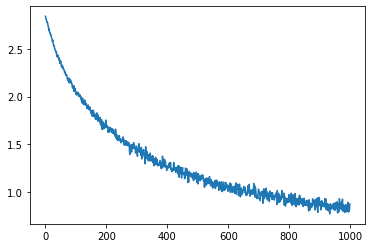

In [6]:
n_classes = len(Omega_X)

def softmax(x, W, b):
    y = W @ x + b
    soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
    return soft_max

def ce(g, batch_train_set_y, batch_train_set_x, W1, b1, W2, b2):
    Lce = 0
    n = 0
    for k in range(len(batch_train_set_x)):
        x = torch.tensor(batch_train_set_x[k])
        y = batch_train_set_y[k]
        alpha = torch.zeros((len(x), n_classes))
        alpha[0] = softmax(y[0], W1, b1)
        for i in range(len(x) - 1):
            alpha_i = torch.zeros(n_classes, n_classes)
            for j in range(n_classes):
                ohe = torch.zeros(n_classes)
                ohe[j] = 1
                word = torch.cat((ohe, y[i+1]), 0)
                prod = alpha[i,j].item()
                result = prod * softmax(word, W2, b2)
                alpha_i[j]=result
            alpha[i + 1] = torch.sum(alpha_i,0)
        for i in range(len(x)):
            label = x[i]
            Lce -= torch.log(alpha[i][label])
            n += 1
    Lce /= n
    return Lce

def accuracy(W1, b1, W2, b2, test_set_y, test_set_x):
    accuracy = []
    for k in range(len(test_set_x)):
        x = torch.tensor(test_set_x[k])
        y = test_set_y[k]
        alpha = torch.zeros((len(x), n_classes))
        alpha[0] = softmax(y[0], W1, b1)
        for i in range(len(x) - 1):
            alpha_i = torch.zeros(n_classes, n_classes)
            for j in range(n_classes):
                ohe = torch.zeros(n_classes)
                ohe[j] = 1
                word = torch.cat((ohe, y[i+1]), 0)
                prod = alpha[i,j].item()
                result = prod * softmax(word, W2, b2)
                alpha_i[j]=result
            alpha[i + 1] = torch.sum(alpha_i,0)
        for i in range(len(x)):
            label = x[i]
            predict = torch.argmax(alpha[i])
            if predict == label :
                accuracy.append(1)
            else :
                accuracy.append(0)
    accuracy = np.array(accuracy)
    n = len(accuracy)
    accuracy = np.sum(np.array(accuracy)) / n
    return accuracy
    
W1 = torch.load("TP4_functions/W_lr1.pt").requires_grad_(True)
b1 = torch.load("TP4_functions/b_lr1.pt").requires_grad_(True)
W2 = torch.load("TP4_functions/W_lr2.pt").requires_grad_(True)
b2 = torch.load("TP4_functions/b_lr2.pt").requires_grad_(True)

alpha = 0.0005

K = 1000
list_L = torch.zeros(K)
optimizer = optim.Adam([W1, b1, W2, b2], lr = alpha)

for k in range(K):
    optimizer.zero_grad()
    
    random_index = np.random.randint(0, len(train_set_x),size = 32)
    batch_train_set_x = []
    batch_train_set_y = []
    for i in random_index:
        batch_train_set_x.append(train_set_x[i])
        batch_train_set_y.append(train_set_y[i])
    
    loss = ce(softmax, batch_train_set_y, batch_train_set_x, W1, b1, W2, b2)
    loss.backward()
    optimizer.step()

    list_L[k] = loss.item()

    if k % 50 == 0:
            print(k)
            print("Loss:", list_L[k])
            print("Accuracy:", accuracy(W1, b1, W2, b2, test_set_y, test_set_x))

print("Accuracy final:", accuracy(W1, b1, W2, b2, test_set_y, test_set_x))
plt.plot(list_L)
plt.show()

### vérification énoncé :

In [14]:
n_classes = len(Omega_X)

def softmax(x, W, b):
    y = W @ x + b
    soft_max = torch.exp(y - torch.max(y)) / torch.sum(torch.exp(y - torch.max(y)))
    return soft_max

def ce(g, batch_train_set_y, batch_train_set_x, W1, b1, W2, b2):
    Lce = 0
    n = 0
    for k in range(len(batch_train_set_x)):
        x = torch.tensor(batch_train_set_x[k])
        y = batch_train_set_y[k]
        alpha = torch.zeros((len(x), n_classes))
        alpha[0] = softmax(y[0], W1, b1)
        for i in range(len(x) - 1):
            alpha_i = torch.zeros(n_classes, n_classes)
            for j in range(n_classes):
                ohe = torch.zeros(n_classes)
                ohe[j] = 1
                word = torch.cat((ohe, y[i+1]), 0)
                prod = alpha[i,j].item()
                result = prod * softmax(word, W2, b2)
                alpha_i[j]=result
            alpha[i + 1] = torch.sum(alpha_i,0)
        for i in range(len(x)):
            label = x[i]
            Lce -= torch.log(alpha[i][label])
            n += 1
    Lce /= n
    return Lce

def accuracy(W1, b1, W2, b2, test_set_y, test_set_x):
    accuracy = []
    for k in range(len(test_set_x)):
        x = torch.tensor(test_set_x[k])
        y = test_set_y[k]
        alpha = torch.zeros((len(x), n_classes))
        alpha[0] = softmax(y[0], W1, b1)
        for i in range(len(x) - 1):
            alpha_i = torch.zeros(n_classes, n_classes)
            for j in range(n_classes):
                ohe = torch.zeros(n_classes)
                ohe[j] = 1
                word = torch.cat((ohe, y[i+1]), 0)
                prod = alpha[i,j].item()
                result = prod * softmax(word, W2, b2)
                alpha_i[j]=result
            alpha[i + 1] = torch.sum(alpha_i,0)
        for i in range(len(x)):
            label = x[i]
            predict = torch.argmax(alpha[i])
            if predict == label :
                accuracy.append(1)
            else :
                accuracy.append(0)
    accuracy = np.array(accuracy)
    n = len(accuracy)
    accuracy = np.sum(np.array(accuracy)) / n
    return accuracy
    
W1 = torch.load("TP4_functions/W_lr1.pt").requires_grad_(True)
b1 = torch.load("TP4_functions/b_lr1.pt").requires_grad_(True)
W2 = torch.load("TP4_functions/W_lr2.pt").requires_grad_(True)
b2 = torch.load("TP4_functions/b_lr2.pt").requires_grad_(True)

alpha = 0.0005

K = 1000

optimizer = optim.Adam([W1, b1, W2, b2], lr = alpha)

optimizer.zero_grad()

loss = ce(softmax, train_set_y[:10], train_set_x[:10], W1, b1, W2, b2)
loss.backward()
optimizer.step()

list_L = loss.item()


print("Loss 10 premiers éléments du train set :", list_L)


Loss 10 premiers éléments du train set : 2.8446922302246094


La valeur est proche de 2.7. En échangeant avec mes camarades, on a remarqué une certaine variance dépendant de notre implémentation de l'algorithme, probablement du aux objets pytorch (ces derniers sont assez exigeant, en particulier pour pouvoir effectuer la backward propagation correctement). Cependant, nous avons à peu près tous la même accuracy finale autour de 0.77.